# Support Vector Machines 1

**Q1. What is the mathematical formula for a linear SVM?**

**Ans**:  

**Decision Function:**

The decision function for a linear SVM can be written as:

$$
f(x) = w^T x + b
$$

Where:
- $x$ is a feature vector of an instance.
- $w$ is the weight vector (normal to the hyperplane).
- $b$ is the bias term (offset from the origin).

The sign of $f(x)$ determines the class label of $x$:
- If $f(x) \geq 0$, the instance is classified as one class.
- If $f(x) < 0$, the instance is classified as the other class.

**Objective Function**

To ensure that the hyperplane not only separates the classes but does so with the maximum margin, we need to maximize the margin while ensuring that all data points are correctly classified. The margin is given by $\frac{2}{\|w\|}$. Thus, maximizing the margin is equivalent to minimizing $\frac{1}{2} \|w\|^2$.

The optimization problem can be framed as:

**Minimize:**

$$
\frac{1}{2} \|w\|^2
$$

**Subject to:**

$$
y_i (w^T x_i + b) \geq 1 \quad \text{for all } i
$$

Where:
- $y_i$ is the label of the $i$-th training instance (either +1 or -1).
- $x_i$ is the feature vector of the $i$-th training instance.

**Constraints**

The constraints ensure that each training instance is correctly classified with a margin of at least 1. This ensures that the hyperplane not only separates the classes but does so with the maximum possible margin.

**Q2. What is the objective function of a linear SVM?**

**Ans:**  

**Objective Function**

The primary goal of a linear Support Vector Machine (SVM) is to find the optimal hyperplane that separates two classes with the maximum margin. 

The margin is defined as the distance between the hyperplane and the closest data points from either class (known as support vectors). Mathematically, the margin can be expressed as $\frac{2}{\|w\|}$, where $\|w\|$ is the Euclidean norm of the weight vector $w$. To maximize the margin, we need to minimize $\frac{1}{2} \|w\|^2$, since maximizing the margin is equivalent to minimizing this quantity.

**Formally, the optimization problem can be stated as:**

**Minimize:**

$$
\frac{1}{2} \|w\|^2
$$

**Subject to:**

$$
y_i (w^T x_i + b) \geq 1 \quad \text{for all } i
$$

Where:
- $x_i$ is the feature vector of the $i$-th training instance.
- $y_i$ is the label of the $i$-th training instance (either +1 or -1).
- $w$ is the weight vector.
- $b$ is the bias term.


**Q3. What is the kernel trick in SVM?**

**Ans:**  

**Kernel Trick in SVM**

The **kernel trick** is a powerful technique used in Support Vector Machines (SVMs) to enable the algorithm to learn in higher-dimensional spaces without explicitly computing the coordinates in those spaces. This allows SVMs to find a hyperplane that can separate data that is not linearly separable in the original input space.

#### **Concept of the Kernel Trick**

In essence, the kernel trick involves transforming the input data into a higher-dimensional space where a linear separator (hyperplane) might exist, even if it doesn't in the original space. Instead of performing this transformation explicitly, the kernel trick allows us to compute the inner products of the transformed data points directly using a kernel function. This computation is more efficient and avoids the high computational cost of working in high-dimensional space.

#### **Mathematical Formulation**

Consider an SVM with a decision function:

$$
f(x) = w^T x + b
$$

When applying the kernel trick, the decision function is modified to work in the higher-dimensional space using a kernel function \( K(x_i, x_j) \) which computes the inner product of the data points in this higher-dimensional space. The decision function becomes:

$$
f(x) = \sum_{i=1}^l \alpha_i y_i K(x_i, x) + b
$$

Where:
- $x$ is a new data point.
- $x_i$ are the support vectors.
- $\alpha_i$ are the Lagrange multipliers obtained from solving the dual problem of the SVM optimization.
- $y_i$ are the labels of the support vectors.
- $K(x_i, x)$ is the kernel function that computes the inner product in the transformed space.

#### **Common Kernel Functions**

Several kernel functions are commonly used, each allowing different kinds of transformations:

1. **Linear Kernel**

   The simplest kernel function, which corresponds to no transformation:

   $$
   K(x_i, x_j) = x_i^T x_j
   $$

2. **Polynomial Kernel**

   Computes the inner product in a polynomial feature space:

   $$
   K(x_i, x_j) = (x_i^T x_j + c)^d
   $$

   Where $d$ is the degree of the polynomial and $c$ is a constant.

3. **Radial Basis Function (RBF) or Gaussian Kernel**

   A popular kernel that maps the data into an infinite-dimensional space:

   $$
   K(x_i, x_j) = \exp \left( -\frac{\|x_i - x_j\|^2}{2\sigma^2} \right)
   $$

   Where $\sigma$ is a parameter controlling the width of the Gaussian function.

4. **Sigmoid Kernel**

   Similar to the activation function used in neural networks:

   $$
   K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c)
   $$

   Where $\alpha$ and $c$ are parameters.

#### **Benefits of the Kernel Trick**

- **Flexibility**: Allows SVMs to handle non-linearly separable data by implicitly mapping it to a higher-dimensional space.
- **Efficiency**: Avoids the computational cost of explicitly transforming data into high-dimensional spaces by computing inner products directly using kernel functions.
- **Versatility**: Different kernels enable modeling a variety of data distributions and complex decision boundaries.


**Q4. What is the role of support vectors in SVM Explain with example**

**Ans:**  

**Role of Support Vectors in SVM**

In Support Vector Machines (SVMs), **support vectors** play a critical role in defining the optimal hyperplane that separates the classes. They are the data points that are closest to the decision boundary (hyperplane) and directly influence its position and orientation.

#### **Role of Support Vectors**

1. **Defining the Decision Boundary**: Support vectors are the data points that lie on the edge of the margin or are closest to the hyperplane. They are crucial because the hyperplane is positioned such that it maximizes the margin between the classes. The support vectors are the only points that determine the position of this hyperplane; other data points, while contributing to the margin, do not affect the placement of the hyperplane.

2. **Maximizing the Margin**: The SVM algorithm aims to maximize the margin, which is the distance between the hyperplane and the closest data points from either class. This margin is maximized by the support vectors, which lie exactly at the boundary of this margin. The distance between the support vectors and the hyperplane helps in determining the optimal hyperplane that maximizes this margin.

3. **Influencing the Model**: The decision function of the SVM is directly influenced by the support vectors. If you remove a support vector, it can change the position of the hyperplane. Conversely, removing a non-support vector (a point far from the decision boundary) does not affect the hyperplane or the model's performance.


**Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?**

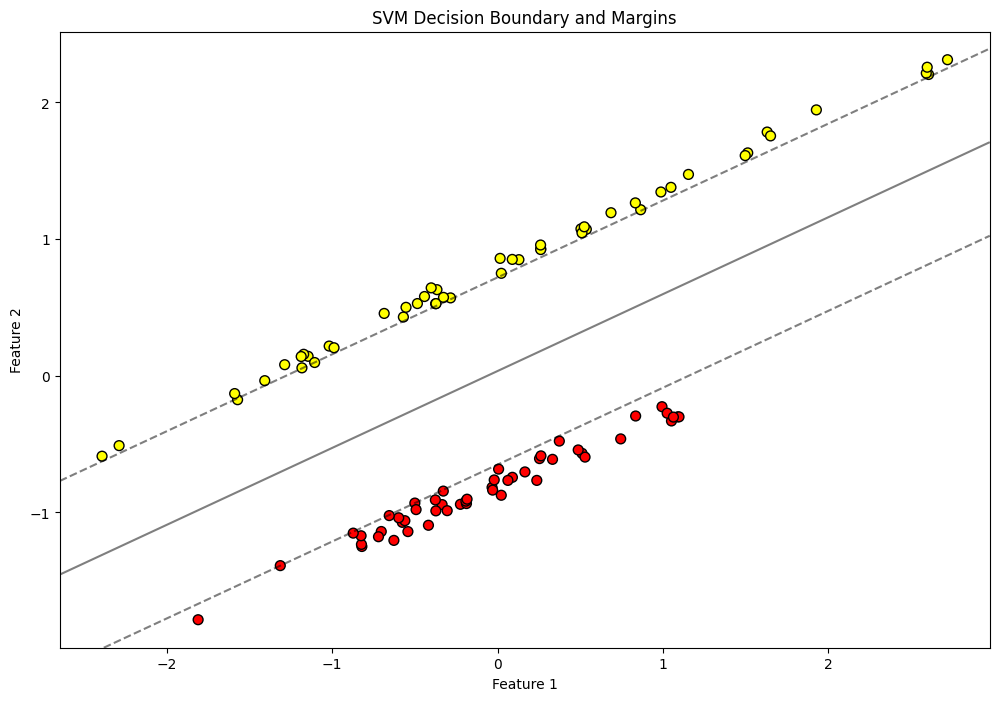

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
def generate_data():
    X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                         n_redundant=0, n_clusters_per_class=1, random_state=42)
    return X, y

X, y = generate_data()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit SVM model
def fit_svm(X, y, C=1.0, kernel='linear'):
    model = SVC(C=C, kernel=kernel, decision_function_shape='ovr')
    model.fit(X, y)
    return model

model = fit_svm(X_scaled, y)

# Plotting function
def plot_svm_decision_boundary(X, y, model):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=50, edgecolors='k')
    
    # Create grid to evaluate model
    xlim = plt.xlim()
    ylim = plt.ylim()
    XX, YY = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    # Plot decision boundary and margins
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    
    plt.title('SVM Decision Boundary and Margins')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_svm_decision_boundary(X_scaled, y, model)


**Here is what each graph illustrates:**

- **Hyperplane**: The solid line represents the hyperplane that separates the classes.
- **Marginal Planes**: The dashed lines represent the marginal planes that define the margin.
- **Hard Margin**: This example assumes a hard margin SVM where the decision boundary does not allow for any misclassifications.
- **Soft Margin**: If you were to use a non-linear kernel or a different `C` value, you would see the effect of soft margins.


**Q6. SVM Implementation through Iris dataset.**

- Load the iris dataset from the scikit-learn library and split it into a training set and a testing set
- Train a linear SVM classifier on the training set and predict the labels for the testing set
- Compute the accuracy of the model on the testing set
- Plot the decision boundaries of the trained model using two of the features
- Try different values of the regularisation parameter C and see how it affects the performance of the model.

**Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.**


**Ans:**  
1. **Load the iris dataset from the scikit-learn library and split it into a training set and a testing set**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
##Loading the data and spliting it

df = load_iris()

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
X = df.data
y = df.target 

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
# Display the shape of the resulting datasets
print(f"Training set features shape: {X_train.shape}")
print(f"Training set labels shape: {y_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Testing set labels shape: {y_test.shape}")

Training set features shape: (105, 4)
Training set labels shape: (105,)
Testing set features shape: (45, 4)
Testing set labels shape: (45,)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**2. Train a linear SVM classifier on the training set and predict the labels for the testing set**

In [9]:
from sklearn.svm import SVC

In [10]:
classifier_svm = SVC(kernel="linear")

In [11]:
classifier_svm.fit(X_train,y_train)

SVC(kernel='linear')

In [12]:
y_pred = classifier_svm.predict(X_test)

3. **Compute the accuracy of the model on the testing set**

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
acc_score = accuracy_score(y_test,y_pred)

In [15]:
print(f"Accuracy of the linear SVM classifier on the testing set: {acc_score:.2f}")

Accuracy of the linear SVM classifier on the testing set: 0.98


4. **Plot the decision boundaries of the trained model using two of the features**

C:\Users\dhyan\AppData\Local\Temp\ipykernel_16564\3558894566.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.RdYlBu, marker='x', s=100)


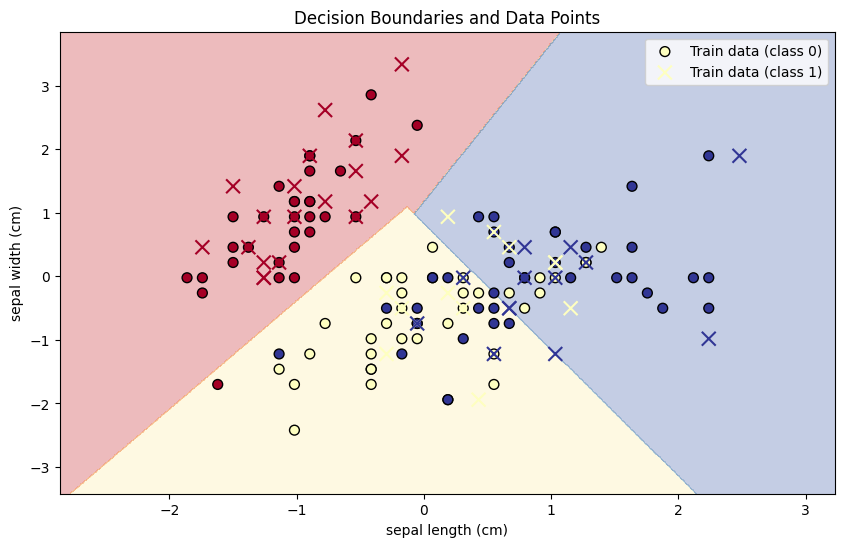

In [16]:
# For simplicity, use only the first two features
X_2d = X[:,:2]
X_2d_train,X_2d_test,y_train,y_test = train_test_split(X_2d,y,test_size=0.3,random_state=42)
scaler = StandardScaler()
X_2d_train = scaler.fit_transform(X_2d_train)
X_2d_test = scaler.transform(X_2d_test)

classifier_svm_2d = SVC(kernel="linear")
classifier_svm_2d.fit(X_2d_train,y_train)


feature_names = df.feature_names[:2]

# Create a mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = classifier_svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu, marker='o', s=50)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.RdYlBu, marker='x', s=100)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Decision Boundaries and Data Points')
plt.legend(['Train data (class 0)', 'Train data (class 1)', 'Train data (class 2)', 'Test data (class 0)', 'Test data (class 1)', 'Test data (class 2)'], loc='upper right')
plt.show()

5. **Try different values of the regularisation parameter C and see how it affects the performance of
the model.**

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1.0, 10, 100]}

# Initialize the SVC model
svc = SVC(kernel='linear', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict the labels for the testing set
y_pred = best_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy:.2f}")

# Print best parameters
print(f"Best parameters found: {grid_search.best_params_}")


Accuracy of the best model: 0.98
Best parameters found: {'C': 10}


**Bonus Task**: **Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.**

In [18]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0
        y = np.where(y == 0, -1, y)  # Convert labels to -1, 1 for SVM
        
        for _ in range(self.epochs):
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.W) + self.b) < 1:
                    self.W += self.learning_rate * ((X[i] * y[i]) - 2 * self.lambda_param * self.W)
                    self.b += self.learning_rate * y[i]
                else:
                    self.W -= self.learning_rate * 2 * self.lambda_param * self.W

    def predict(self, X):
        return np.where(np.dot(X, self.W) + self.b >= 0, 1, -1)


In [19]:
# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# For binary classification, select two classes (0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the custom SVM model
custom_svm = LinearSVM(learning_rate=0.01, lambda_param=0.01, epochs=1000)
custom_svm.fit(X_train, y_train)

# Predict and evaluate the custom SVM model
y_pred_custom = custom_svm.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Custom Linear SVM Accuracy: {accuracy_custom:.2f}")

Custom Linear SVM Accuracy: 0.43


The scikit learn library works far better compared to the SWM Classifier created from scratch